# 需求

1.	在原申報系統 (A系統)資料，定期匯出到資料放入資料庫系統(B系統)，分級標示登錄資料正規化處理 (規格與產銷量)；節能標章登錄資料規格與產銷量之正規化處理 (各欄位數據有效位數統一) 

2.	建立資料顯示欄位 (依提供標註橘色)，未來可依照選取項目匯出EXCEL檔
        ==> 選擇欄位
3.	顯示”標示義務公司”(分級標示)、”獲證廠商”(節能標章)銷售排名
        ==> 
4.	核對分級標示系統每一型號，可依需要設定與前一年落差%、與前二年落差%，匯出銷售量異常資料，是否有缺申報或申報異常，以標示義務公司”(分級標示)進行檔案命名，供後續寄發通知信
5.	核對節能標章系統每一型號，可依需要設定與前一年落差%、與前二年落差%，匯出銷售量異常資料，是否有缺申報或申報異常，以”獲證廠商”(節能標章)進行檔案命名，供後續寄發通知信
6.	分級標示產品同時申請節能標章的型號，核對每一型號，銷售量是否一致，若不一致，以”獲證廠商”(節能標章)進行檔案命名，供後續寄發通知信
        ==> 計算當年跟前年的落差比例，以型號跟公司示警

7.	依年分匯出分級標示各類產品 [繪圖與EXCEL]
(1) 各分級級數款數、占比；
(2) 各分級銷售量、占比;
(3) 依廠商各分級級數款數、占比;
(4) 依廠商各分級銷售量、占比; 
(5) 依廠商總體銷售量、占比 

8.	有各型號銷售量，增加前期基準值欄位、節能計算公式欄位，以銷售量計算其節電結果。[分級標示產品與節能標章產品]
        ==> 增加前期基準值欄位、節能計算公式欄位為空格

9 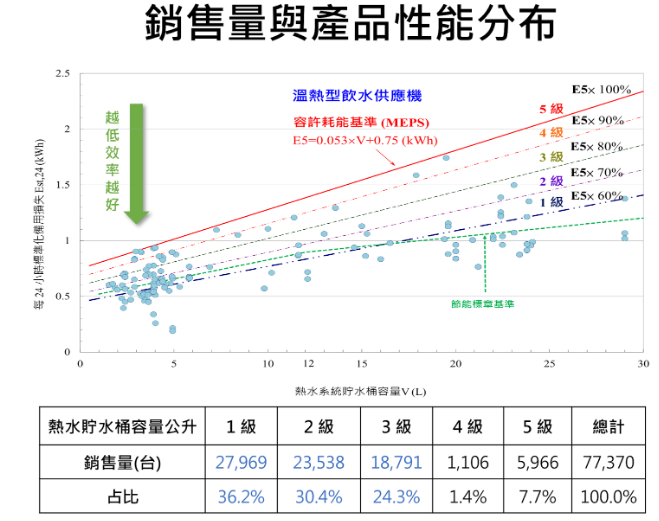
X,Y軸給予空格讓使用者自行填入



# 預計提供

圖表:
- quickreport:
    - 正規化分級表格 選擇欄位功能(給予使用者quickreport編輯頁面，讓使用者自己選擇) 1   DONE
    - 正規畫標章表格 選擇欄位功能(給予使用者quickreport編輯頁面，讓使用者自己選擇) 1   DONE
    - 標示義務公司(分級標示)銷售排行長條圖 1  DONE
    - 獲證廠商(節能標章)銷售排行長條圖 1  
    - 依年分匯出分級標示各類產品 EXCEL & 圖表 共 5
        - 個分級占比 圓餅圖
        - 各分級銷量占比 圓餅
        - 廠商各分級款數占比 堆疊圖
        - 廠商各分級銷售佔比 堆疊圖
        - 廠商總體銷量占比 圓餅圖
        - 依照銷售量&基準值&公式計算節電結果。
            - 挖空：(___基準值)or(___消耗功率(W) × ___使用時間(h) ÷ 1000)
- excel:
    - 針對分級、標章及分級和標章的銷售資料，判斷有無跟前年或前幾年落差%，落差公司匯出excel。
        -  挖空：___%,___年
- 自訂圖表:
    - 銷售量與產品性能(節電能力?)泡泡圖  DONE
        - 挖空：___x,___y (下拉選擇numerical欄位)
- API: 
    - 報表：分級/標章銷售「落差%」Excel 匯出 1  DONE
    - 圖表：泡泡圖資料   DONE
    - 表格：銷售節電結果



# 問題

- 分級標示登錄資料正規化處理 (規格與產銷量) =>規格等於效能之類的數值?


#### 資料輸入

In [3]:
import sys
sys.path.append(r'D:\markding_git\itri_etl_analysis\api_code')
from mysql_insertion import mysql_insertion

In [4]:
import pandas as pd
df_grading = pd.read_excel(r'D:\markding_git\itri_etl_analysis\fwdsampledata\已登錄產品之細項與核准項目 (溫熱型開飲機_ALL)-110_標註顯示欄位.xlsx')
df_label = pd.read_excel(r'D:\markding_git\itri_etl_analysis\fwdsampledata\溫熱型開飲機節能標章產品規格(含108-110年產銷量)_標註必要欄位.xlsx')

### 1. 在原申報系統 (A系統)資料，定期匯出到資料放入資料庫系統(B系統)，分級標示登錄資料正規化處理 (規格與產銷量)；節能標章登錄資料規格與產銷量之正規化處理 (各欄位數據有效位數統一)

In [21]:
df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   申請序號                             57 non-null     object 
 1   標章公司                             57 non-null     object 
 2   合約號                              57 non-null     object 
 3   類別名稱                             57 non-null     object 
 4   型號                               57 non-null     object 
 5   產地                               57 non-null     object 
 6   測試單位                             57 non-null     object 
 7   起約日期                             57 non-null     object 
 8   到約日期                             57 non-null     object 
 9   廠牌名稱                             46 non-null     object 
 10  商驗證編號                            57 non-null     object 
 11  商驗證有效日期                          57 non-null     object 
 12  CCCCode                 

#### Duplicated

In [22]:
duplicated_df = df_grading[df_grading.duplicated(['廠牌名稱','產品型號','2020產量'])]

In [23]:
duplicated_df[duplicated_df.產品型號 == 'YS-9387DW'].產品能源效率

162    1.000
182    0.942
Name: 產品能源效率, dtype: float64

In [25]:
duplicated_df[duplicated_df.產品型號 == 'YS-9387DW']

,產品類別,申請案號,登錄編號,登錄年度,登錄身分,受委託登錄機構,標示義務公司,生產廠場名稱,產品類別.1,2020產量,...,最低容許耗能基準測試標準及方法,進口_國產,失效日期,失效原因,檢測報告編號,驗證登錄證書號碼,申請時間,收件日期,BSMI證書列示國別,BSMI證書列示廠址
162,溫熱型開飲機,WD-106N-0018,WD-106-0022,106,自行登錄,元山科技工業股份有限公司,元山科技工業股份有限公司,元久科技工業股份有限公司,溫熱型開飲機,0.0,...,CNS13516,國產、,2019/3/12 下午 02:28:10,重新申請,16-10-NEF-041-S,NaN,2017/01/23 13:18,2017/01/23 13:26,中華民國、,元久科技工業股份有限公司_彰化縣和美鎮彰美路三段392號、
182,溫熱型開飲機,WD-110R-0002,WD-110-0002,110,自行登錄,元山科技工業股份有限公司,元山科技工業股份有限公司,元久科技工業股份有限公司官田廠,溫熱型開飲機,0.0,...,CNS13516,國產、,NaN,NaN,16-10-NEF-041-S、19-02-NEF-030-S,CI736060231428,2021/04/13 11:05,2021/04/13 13:43,、,元久科技工業股份有限公司官田廠_台南市官田區官田里官田421號2樓C棟、


In [17]:
duplicated_df[['廠牌名稱','產品型號']]

,廠牌名稱,產品型號
162,元山,YS-9387DW
182,元山,YS-9387DW
200,元山,YS-8300DWB
235,元山,YS-8300DWB
237,元山,YS-9387DWE
243,元山,YS-8387DW
249,元山,YS-8305DWG
262,元山,YS-825DW
268,元山,YS-870DW
269,元山,YS-860DW


In [ ]:
duplicated_df.nunique().sort_values()

產品類別                                 1
登錄身分                                 1
2020產量                               1
產品類別.1                               1
銘版產地                                 1
2020銷售量                              1
是否符合最低能源效率基準                         1
最低容許耗能基準測試標準及方法                      1
進口_國產                                1
額定熱水系統消耗功率(W)                        2
產品效率分級                               2
標示義務公司                               2
額定最大消耗功率(W)                          2
失效原因                                 2
廠牌名稱                                 2
受委託登錄機構                              2
驗證登錄證書號碼                             2
BSMI證書列示國別                           2
熱水系統貯水桶容量實測值(L)                      3
溫水貯水桶容量實測值(L)                        3
溫水貯水桶容量標示值(L)                        3
安規試驗單位                               3
生產廠場名稱                               3
登錄年度                                 3
額定保溫加熱器消耗功率(W)                       3
最低能源效率基準                 

#### Check 分級(grading) and 標章(labeling)

In [ ]:
df_grading['2020產量']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
279    NaN
280    0.0
281    0.0
282    0.0
283    0.0
Name: 2020產量, Length: 284, dtype: float64

In [30]:
df_label['109產量']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12      300.0
13     1800.0
14     1200.0
15        NaN
16      400.0
17        0.0
18      600.0
19     1200.0
20        NaN
21        NaN
22        NaN
23        NaN
24        NaN
25        NaN
26        0.0
27        0.0
28      500.0
29        0.0
30        NaN
31        NaN
32        NaN
33        NaN
34        NaN
35        NaN
36        NaN
37        NaN
38        NaN
39        NaN
40        NaN
41        NaN
42        NaN
43        NaN
44        NaN
45        NaN
46        NaN
47        NaN
48        NaN
49    10250.0
50        0.0
51     8016.0
52     6224.0
53        NaN
54        0.0
55        NaN
56        NaN
Name: 109產量, dtype: float64

In [37]:
df_grading.merge(df_label, how = 'inner', left_on=['產品型號','2020產量'], right_on=['型號','109產量'])[['登錄年度','產品型號','登錄身分']]

,登錄年度,產品型號,登錄身分
0,106,YS-8626DW,自行登錄
1,108,L23,自行登錄
2,106,YS-8300DWB,自行登錄
3,105,JD-3713,自行登錄
4,108,YS-8300DWB,自行登錄
5,108,L24,自行登錄
6,108,SA-HQ01,委託登錄
7,108,YS-8300DWB,自行登錄


In [ ]:
from typing import Union

def process_data(data: Union[int, str]) -> Union[int, str]:
    if isinstance(data, int):
        return data * 2
    else:
        return data.upper()

result1 = process_data(10)  # result1 is an int
result2 = process_data("hello") # result2 is a str

In [14]:
env = {'sales_col': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 292.0, 1640.0, 1039.0, 0.0, 411.0, 0.0, 689.0, 1034.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 400.0, 40.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4900.0, 0.0, 1439.0, 1794.0, 0.0, 0.0, 0.0, 0.0], 'benchmark_col': [1.24299999999999, 1.243, 1.243, 1.243, 1.243, 1.243, 1.243, 1.243, 1.243, 1.243, 1.243, 1.243, 1.053, 1.053, 1.053, 1.24299999999999, 1.053, 1.053, 1.053, 1.053, 1.24299999999999, 1.24299999999999, 1.24299999999999, 1.243, 1.243, 1.636, 0.942, 0.942, 1.053, 0.864, 1.61242, 1.61242, 1.636, 1.256, 1.269, 1.23, 1.466, 1.466, 1.466, 1.466, 1.466, 1.243, 1.2299, 1.2299, 1.23, 1.2299, 1.636, 1.636, 1.112, 0.986, 0.942, 0.986, 0.942, 1.217, 0.986, 1.217, 1.112], 'benchmark_col2': [45.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 70.0, 70.0, 70.0, 45.0, 70.0, 70.0, 70.0, 70.0, 45.0, 46.0, 46.0, 40.0, 40.0, 50.0, 0.0, 0.0, 35.0, 0.0, 0.0, 0.0, 50.0, 90.0, 90.0, 90.0, 90.0, 90.0, 45.0, 90.0, 45.0, 90.0, 90.0, 90.0, 90.0, 90.0, 50.0, 50.0, 30.0, 30.0, 30.0, 30.0, 30.0, 31.6, 33.2, 31.6, 30.0]}
formula =  '(sales_col - benchmark_col) * benchmark_col2 / 1000'

顯示”標示義務公司”(分級標示)、”獲證廠商”(節能標章)銷售排名

In [26]:
df_grading.columns

Index(['產品類別', '申請案號', '登錄編號', '登錄年度', '登錄身分', '受委託登錄機構', '標示義務公司', '生產廠場名稱',
       '產品類別.1', '2020產量', '2020銷售量', '產品型號', '銘版產地', '產品能源效率', '產品效率分級',
       '最低能源效率基準', '是否符合最低能源效率基準', '廠牌名稱', '登錄通過日期', '安規試驗單位', '系列型號參照之測試報告型號',
       '額定最大消耗功率(W)', '額定熱水系統消耗功率(W)', '額定保溫加熱器消耗功率(W)', '熱水系統貯水桶容量標示值(L)',
       '熱水系統貯水桶容量實測值(L)', '溫水貯水桶容量標示值(L)', '溫水貯水桶容量實測值(L)', '熱水系統24小時平均水溫(℃)',
       '周圍溫度(℃)', '每24小時備用損失E24(kWh/24小時)標示值', '每24小時備用損失E24(kWh/24小時)實測值',
       '每24小時標準化備用損失Est,24 (kWh/24小時)標示值', '每24小時標準化備用損失Est,24 (kWh/24小時)實測值',
       '每年保溫耗電量', '最低容許耗能基準測試標準及方法', '進口_國產', '失效日期', '失效原因', '檢測報告編號',
       '驗證登錄證書號碼', '申請時間', '收件日期', 'BSMI證書列示國別', 'BSMI證書列示廠址'],
      dtype='object')

In [ ]:
df_grading_sale_record = df_grading.groupby(['標示義務公司'])[['2020銷售量']].sum().reset_index()

In [38]:
mysql_insertion(df_sale_record, 'sale_record_grading')

25

In [41]:
df_label.columns

Index(['申請序號', '標章公司', '合約號', '類別名稱', '型號', '產地', '測試單位', '起約日期', '到約日期',
       '廠牌名稱', '商驗證編號', '商驗證有效日期', 'CCCCode', '108產量', '108銷售量', '109產量',
       '109銷售量', '110產量', '110銷售量', '測試報告編號', '能效型號', '是否為測試型號',
       '系列型號參照之測試報告型號<br>', '寬(mm)', '高(mm)', '深(mm)', '熱水總功率(W)', '保溫功率(W)',
       '包裝飲用水專用機', '生水容量(L)', '實測熱水貯水桶容量(L)', '標示熱水貯水桶容量(L)', '溫水箱容量(L)',
       '溫水溫度(℃)', '熱水溫度(℃)', '熱水系統24小時平均水溫(°C)', '周圍溫度(°C)',
       '能源因素值EFtest (L/(kWh/day))', '能源因素值EFbase(L/(kWh/day))',
       '每24小時備用損失實測值(E24)( kWh)', '等效容積換算係數(K)',
       '每24小時標準化備用損失實測值( Est,24) ( kWh)', '每24小時標準化備用損失驗算值( Est,24) ( kWh)',
       '每24小時標準化備用損失標示值( Est,24) ( kWh)', '溫熱型開飲機節能標章能源耗用基準(E)(kWh/24h)'],
      dtype='object')

In [45]:
df_label_sale_record = df_label.groupby(['標章公司'])[['108銷售量', '109銷售量', '110銷售量']].sum().reset_index()
df_label_sale_record

,標章公司,108銷售量,109銷售量,110銷售量
0,元山科技工業股份有限公司,5798.0,8133.0,3008.0
1,台灣明尼蘇達礦業製造股份有限公司,0.0,0.0,0.0
2,捷寶光電股份有限公司,0.0,0.0,0.0
3,旺德電通股份有限公司,75.0,40.0,0.0
4,普鴻國際股份有限公司,1230.0,400.0,0.0
5,東元電機股份有限公司,0.0,0.0,0.0
6,東龍工業股份有限公司,0.0,0.0,0.0
7,森泉企業股份有限公司,0.0,5105.0,19934.0


In [46]:
mysql_insertion(df_label_sale_record, 'sale_record_label')

8

核對分級標示系統每一型號，可依需要設定與前一年落差%、與前二年落差%，匯出銷售量異常資料，是否有缺申報或申報異常，以標示義務公司”(分級標示)進行檔案命名，供後續寄發通知信

有各型號銷售量，增加前期基準值欄位、節能計算公式欄位，以銷售量計算其節電結果。[分級標示產品與節能標章產品]
        ==> 增加前期基準值欄位、節能計算公式欄位為空格

In [48]:
grading_numeric_cols = [
    "2020產量", "2020銷售量",
    "額定最大消耗功率(W)", "額定熱水系統消耗功率(W)", "額定保溫加熱器消耗功率(W)",
    "熱水系統貯水桶容量標示值(L)", "熱水系統貯水桶容量實測值(L)",
    "溫水貯水桶容量標示值(L)", "溫水貯水桶容量實測值(L)",
    "熱水系統24小時平均水溫(℃)", "周圍溫度(℃)",
    "每24小時備用損失E24(kWh/24小時)標示值", "每24小時備用損失E24(kWh/24小時)實測值",
    "每24小時標準化備用損失Est,24 (kWh/24小時)標示值",
    "每24小時標準化備用損失Est,24 (kWh/24小時)實測值",
    "每年保溫耗電量"
]
label_numeric_cols = ['108產量',
 '108銷售量',
 '109產量',
 '109銷售量',
 '110產量',
 '110銷售量',
 '寬(mm)',
 '高(mm)',
 '深(mm)',
 '熱水總功率(W)',
 '保溫功率(W)',
 '生水容量(L)',
 '實測熱水貯水桶容量(L)',
 '標示熱水貯水桶容量(L)',
 '溫水箱容量(L)',
 '溫水溫度(℃)',
 '熱水溫度(℃)',
 '熱水系統24小時平均水溫(°C)',
 '周圍溫度(°C)',
 '能源因素值EFtest (L/(kWh/day))',
 '能源因素值EFbase(L/(kWh/day))',
 '每24小時備用損失實測值(E24)( kWh)',
 '等效容積換算係數(K)',
 '每24小時標準化備用損失實測值( Est,24) ( kWh)',
 '每24小時標準化備用損失驗算值( Est,24) ( kWh)',
 '每24小時標準化備用損失標示值( Est,24) ( kWh)',
 '溫熱型開飲機節能標章能源耗用基準(E)(kWh/24h)']

In [49]:
from enum import Enum

class Table(str, Enum):
    label = "label"
    grade = "grade"

TABLE_COLS = {
    Table.label: label_numeric_cols,
    Table.grade: grading_numeric_cols,
}


In [90]:
TABLE_COLS['grade']

['2020產量',
 '2020銷售量',
 '額定最大消耗功率(W)',
 '額定熱水系統消耗功率(W)',
 '額定保溫加熱器消耗功率(W)',
 '熱水系統貯水桶容量標示值(L)',
 '熱水系統貯水桶容量實測值(L)',
 '溫水貯水桶容量標示值(L)',
 '溫水貯水桶容量實測值(L)',
 '熱水系統24小時平均水溫(℃)',
 '周圍溫度(℃)',
 '每24小時備用損失E24(kWh/24小時)標示值',
 '每24小時備用損失E24(kWh/24小時)實測值',
 '每24小時標準化備用損失Est,24 (kWh/24小時)標示值',
 '每24小時標準化備用損失Est,24 (kWh/24小時)實測值',
 '每年保溫耗電量']

In [72]:
import seaborn as sns
import matplotlib.pylab as plt

In [80]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False

In [88]:
parms = {
    'font.size': 15,
    'axes.titlesize': 'large',
    'legend.fontsize':20,
    'legend.handlelength':2,
    'legend.loc':'upper center'
}
plt.rcParams.update(parms )  

In [8]:
df_label.columns

Index(['申請序號', '標章公司', '合約號', '類別名稱', '型號', '產地', '測試單位', '起約日期', '到約日期',
       '廠牌名稱', '商驗證編號', '商驗證有效日期', 'CCCCode', '108產量', '108銷售量', '109產量',
       '109銷售量', '110產量', '110銷售量', '測試報告編號', '能效型號', '是否為測試型號',
       '系列型號參照之測試報告型號<br>', '寬(mm)', '高(mm)', '深(mm)', '熱水總功率(W)', '保溫功率(W)',
       '包裝飲用水專用機', '生水容量(L)', '實測熱水貯水桶容量(L)', '標示熱水貯水桶容量(L)', '溫水箱容量(L)',
       '溫水溫度(℃)', '熱水溫度(℃)', '熱水系統24小時平均水溫(°C)', '周圍溫度(°C)',
       '能源因素值EFtest (L/(kWh/day))', '能源因素值EFbase(L/(kWh/day))',
       '每24小時備用損失實測值(E24)( kWh)', '等效容積換算係數(K)',
       '每24小時標準化備用損失實測值( Est,24) ( kWh)', '每24小時標準化備用損失驗算值( Est,24) ( kWh)',
       '每24小時標準化備用損失標示值( Est,24) ( kWh)', '溫熱型開飲機節能標章能源耗用基準(E)(kWh/24h)'],
      dtype='object')

In [15]:
df_label.groupby(['標章公司','型號','110銷售量'])[['溫熱型開飲機節能標章能源耗用基準(E)(kWh/24h)']].first()

溫熱型開飲機節能標章能源耗用基準(E)(kWh/24h)
標章公司             型號         110銷售量                              
元山科技工業股份有限公司     YS-826DW   1531.0                         0.986
                 YS-8300DWB 0.0                            0.942
                 YS-8301DWB 690.0                          0.986
                 YS-8305DWG 787.0                          0.942
                 YS-8626DW  0.0                            0.986
台灣明尼蘇達礦業製造股份有限公司 L23        0.0                            0.942
                 L24        0.0                            0.942
森泉企業股份有限公司       JD-3702    1387.0                         1.053
                 JD-3703    7871.0                         1.053
                 JD-3706    3712.0                         1.053
                 JD-3709    1689.0                         1.053
                 JD-3713    196.0                          1.053
                 JD-3716    1331.0                         1.053
                 JD-3718    3748.0                         1.053

In [13]:
df_label.groupby(['標章公司','型號','109銷售量'])[['溫熱型開飲機節能標章能源耗用基準(E)(kWh/24h)']].first()

溫熱型開飲機節能標章能源耗用基準(E)(kWh/24h)
標章公司             型號         109銷售量                              
元山科技工業股份有限公司     YS-826DW   4900.0                         0.986
                 YS-8300DWB 0.0                            0.942
                 YS-8301DWB 1439.0                         0.986
                 YS-8305DWG 1794.0                         0.942
                 YS-8626DW  0.0                            0.986
台灣明尼蘇達礦業製造股份有限公司 L23        0.0                            0.942
                 L24        0.0                            0.942
旺德電通股份有限公司       SA-HQ01    40.0                           0.864
普鴻國際股份有限公司       PL-801     400.0                          1.053
森泉企業股份有限公司       JD-3702    292.0                          1.053
                 JD-3703    1640.0                         1.053
                 JD-3706    1039.0                         1.053
                 JD-3709    411.0                          1.053
                 JD-3713    0.0                            1.053
                 JD-3716    689.0                          1.053
                 JD-3718    1034.0                         1.053

In [17]:
df_label.groupby(['標章公司','型號','108銷售量'])[['溫熱型開飲機節能標章能源耗用基準(E)(kWh/24h)']].first()

溫熱型開飲機節能標章能源耗用基準(E)(kWh/24h)
標章公司             型號         108銷售量                              
元山科技工業股份有限公司     YS-825DW   0.0                            1.112
                 YS-826DW   3366.0                         0.986
                 YS-8300DWB 0.0                            0.942
                 YS-8301DWB 1452.0                         0.986
                 YS-8305DWG 980.0                          0.942
                 YS-8626DW  0.0                            0.986
                 YS-9387DW  0.0                            1.112
台灣明尼蘇達礦業製造股份有限公司 L23        0.0                            0.942
                 L24        0.0                            0.942
旺德電通股份有限公司       SA-HQ01    75.0                           0.864
普鴻國際股份有限公司       PL-801     1230.0                         1.053
東龍工業股份有限公司       TE-1131S   0.0                            1.269